In [1]:
import pandas as pd
import seaborn as sns

In [2]:
screen_width_pix = 1920
screen_height_pix = 1080

In [3]:
subjects_to_include = "data/subject_files.txt"
resumes_to_include = "data/resume_names.txt"

In [4]:
subjects_data = []  # contains raw eye-tracking data for each subject
times_subjects = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject
times_subjects_norm = []  # list of dataframes. each dataframe contains times spent per block per resume for each subject, normalized
resumes = []   # resume names
subject_files = []


In [5]:
with open(subjects_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        subject_files.append(line.strip())
        
print(subject_files)

['data/subjects_tsv/subject-0.tsv', 'data/subjects_tsv/subject-2.tsv', 'data/subjects_tsv/subject-3.tsv', 'data/subjects_tsv/subject-4.tsv', 'data/subjects_tsv/subject-5.tsv', 'data/subjects_tsv/subject-6.tsv', 'data/subjects_tsv/subject-9.tsv', 'data/subjects_tsv/subject-10.tsv', 'data/subjects_tsv/subject-11.tsv', 'data/subjects_tsv/subject-12.tsv']


In [6]:
with open(resumes_to_include, 'r') as file:
    lines = file.readlines()
    for line in lines:
        resumes.append(line.strip())
        
print(resumes)

['QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_HANNAH.PNG', 'QUALIFIED_PIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG', 'QUALIFIED_NOPIC_BADSORT_DAVID.PNG', 'QUALIFIED_PIC_BADSORT_DAVID.PNG', 'UNQUALIFIED_PIC_BADSORT_TIAN.PNG', 'UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG', 'QUALIFIED_PIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG', 'QUALIFIED_PIC_BADSORT_RAHUL.PNG', 'QUALIFIED_NOPIC_BADSORT_RAHUL.PNG', 'QUALIFIED_PIC_GOODSORT_EMILIA.PNG', 'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_PIC_GOODSORT_LEA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_MARIA.PNG', 'UNQUALIFIED_PIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_PIC_GOODSORT_KARE.PNG', 'UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG', 'UNQUALIFIED_PIC_GOODSORT_HANS.PNG']


In [7]:
def filter_keys(original_dict, allowed_keys):
    filtered_dict = {key: value for key, value in original_dict.items() if key in allowed_keys}
    return filtered_dict

In [8]:
# pixel coordinates for areas of interest for each resume. coordinates correspond to 1920*1080 resolution

aoi = {
    "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(995,39), (1314,245)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG": {
        "name" : [(605,39), (980,245)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,245), (980,1040)],
        "languages" : [(995,245), (1314,385)],
        "education" : [(995,385), (1314,610)],
        "skills" : [(995,610), (1314,770)],
        "hobbies" : [(995,870), (1314,1040)],
        "soft_skills" : [(995,770), (1314,870)]
    },
    "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "QUALIFIED_PIC_BADSORT_VIKTOR.PNG": {
        "name" : [(605,39), (952,243)],
        "picture" : [(937,39), (1314,243)],
        "experience" : [(937,405), (1314,1040)],
        "languages" : [(605,577), (937,745)],
        "soft_skills" : [(605,265), (937,402)],
        "skills" : [(605,405), (937,575)],
        "education" : [(605,745), (937,1040)],
        "hobbies" : [(937,265), (1314,402)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (944,243)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,255), (944,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
        "name" : [(605,39), (944,243)],
        "picture" : [(950,39), (1040,243)],
        "experience" : [(605,255), (944,797)],
        "languages" : [(950,607), (1040,870)],
        "soft_skills" : [(-1,-1), (-1,-1)],
        "skills" : [(950,423), (1040,605)],
        "education" : [(950,255), (1040,420)],
        "hobbies" : [(605,805), (944,980)]
    },
    "UNQUALIFIED_PIC_GOODSORT_HANS.PNG": {
        "name" : [(605,39), (959,258)],
        "picture" : [(958,39), (1314,258)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG": {
        "name" : [(605,39), (959,258)],
        "picture" : [(-1,-1), (-1,-1)],
        "experience" : [(605,405),(964,955)],
        "languages" : [(958,257),((1314,404))],
        "soft_skills" : [(958,551),(1314,712)],
        "skills" : [(958,404),(1314,547)],
        "education" : [(605,258),(961,404)],
        "hobbies" : [(958,713),(1314,900)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_PIC_ BADSORT_MARIA.PNG": {
        "name" : [(605,39),(954,249)],
        "picture" : [(954,39),(1314,249)],
        "experience" : [(605,254),(954,885)],
        "languages" : [(954,559),(1314,728)],
        "soft_skills" : [(-1,-1),(-1,-1)],
        "skills" : [(954,405),(1314,554)],
        "education" : [(954,249),(1314,401)],
        "hobbies" : [(954,733),(1314,885)]
    },
    "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_GOODSORT_LEA.PNG": {
        "name" : [(605,39),(945,250)],
        "picture" : [(945,39),(1314,250)],
        "experience" : [(945,250),(1314,738)],
        "languages" : [(605,734),(945,910)],
        "soft_skills" : [(605,415),(945,570)],
        "skills" : [(605,574),(945,730)],
        "education" : [(945,742),(1314,990)],
        "hobbies" : [(605,255),(945,410)]
    },
    "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(930,39),(1314,248)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG": {
        "name" : [(605,39),(930,250)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,252),(1314,740)],
        "languages" : [(605,423),(930,650)],
        "soft_skills" : [(605,809),(930,970)],
        "skills" : [(605,654),(930,805)],
        "education" : [(605,43),(930,419)],
        "hobbies" : [(930,744),(1314,890)]
    },
    "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(938,39),(1314,248)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG": {
        "name" : [(605,39),(934,248)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(938,412),(1314,984)],
        "languages" : [(938,252),(1314,408)],
        "soft_skills" : [(605,386),(934,634)],
        "skills" : [(605,638),(934,736)],
        "education" : [(605,740),(934,945)],
        "hobbies" : [(605,252),(934,382)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_HANNAH.PNG": {
        "name" : [(605,39),(995,240)],
        "picture" : [(996,39),(1314,240)],
        "experience" : [(915,245),(1314,965)],
        "languages" : [(605,499),(910,655)],
        "soft_skills" : [(605,829),(910,965)],
        "skills" : [(605,659),(910,825)],
        "education" : [(605,244),(910,495)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(1020,39),(1314,260)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG": {
        "name" : [(605,39),(1015,259)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(910,384),(1314,1040)],
        "languages" : [(605,581),(906,695)],
        "soft_skills" : [(605,264),(906,418)],
        "skills" : [(605,422),(906,577)],
        "education" : [(605,699),(906,1040)],
        "hobbies" : [(910,264),(1314,380)]
    },
    "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(950,39),(1314,240)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_RAHUL.PNG": {
        "name" : [(605,39),(946,232)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(605,236),(946,895)],
        "languages" : [(950,468),(1314,653)],
        "soft_skills" : [(950,808),(1314,956)],
        "skills" : [(950,657),(1314,804)],
        "education" : [(950,244),(1314,464)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(-1,-1),(-1,-1)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    },
    "QUALIFIED_PIC_BADSORT_DAVID.PNG": {
        "name" : [(605,39),(930,238)],
        "picture" : [(930,39),(1314,238)],
        "experience" : [(930,242),(1314,995)],
        "languages" : [(605,863),(930,995)],
        "soft_skills" : [(605,242),(930,506)],
        "skills" : [(605,510),(930,673)],
        "education" : [(605,676),(930,860)],
        "hobbies" : [(-1,-1),(-1,-1)]
    }
}

aoi = filter_keys(aoi, resumes)

In [9]:
for file in subject_files:
    df = pd.read_csv(file, sep='\t')
    
    #using only required fields
    df = df[['CNT', 'TIME', 'TIME_TICK', 'FPOGX', 'FPOGY', 'FPOGS', 'FPOGD', 'FPOGID', 'FPOGV', 'USER']]
    subjects_data.append(df)


In [10]:
subjects_data[3].tail()

,CNT,TIME,TIME_TICK,FPOGX,FPOGY,FPOGS,FPOGD,FPOGID,FPOGV,USER
42482,2126471,14552.66016,4350510956929,0.35375,0.61743,14552.40527,0.25488,25477,1,NaN
42483,2126472,14552.66699,4350511022585,0.35344,0.61727,14552.40527,0.26172,25477,1,NaN
42484,2126473,14552.67383,4350511090324,0.35349,0.61794,14552.40527,0.26855,25477,1,NaN
42485,2126474,14552.68066,4350511155492,0.35369,0.61750,14552.40527,0.27539,25477,1,NaN
42486,2126475,14552.68750,4350511224053,0.35392,0.61723,14552.40527,0.28223,25477,1,NaN


In [11]:
# list of resume names as displayed in the tsv file
#resumes = ['qualified_pic_goodSort_female .png', 'qualified_noPic_ goodSort_female.png', 'UNQUALIFIED_NOPIC_FEMALE_GOODORDER.PNG', 'UNQUALIFIED_PIC_MALE_GOODORDER.PNG']

In [12]:
# find indexes for splitting samples into separate dataframes for each resume
def find_indexes(resumes, df):
    indexes = []
    for resume in resumes:
        
        start_row = df[df['USER'] == resume + ' DISPLAYED']
        end_row = df[df['USER'] == resume + ' HIDDEN']
        if (len(start_row) == 0 or len(end_row)==0):
            continue
        start_index = start_row.index[0]
        end_index = end_row.index[0]
        indexes.append((start_index, end_index))
    return indexes

In [13]:
# grouping samples into fixations:
# eliminate non valid samples by keeping only those with FPOGV == 1
# group by fixation ID
# take fpogx and fpogy values of last sample in the fixation for fixation position. do the same for fixation duration

def group_samples_into_fixations(resume_data_samples, fixations_df):
    for df in resume_data_samples:
        df = df[df['FPOGV'] == 1]
        df = df.groupby('FPOGID').agg({
        'FPOGX' : 'last',
        'FPOGY' : 'last',
        'FPOGD' : 'last'
    }).reset_index()
        fixations_df.append(df)
    

In [14]:
def normalize_times(times):
    total_time = times.get("total_time_on_resume")
    normalized_data = {}
    
    for key, value in times.items():
        #if key != "total_time_on_resume":
        #    normalized_data[key] = value / total_time
        #else:
        normalized_data[key] = value / total_time  # Keep total_time_on_resume as it is

    return normalized_data

In [15]:
for subject_data in subjects_data:
    
    # data structure to store amount of time spent fixation on each area for each resume

    times = {
        "QUALIFIED_PIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_VIKTOR.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_KARE.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_HANS.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_HANS.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_MARIA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_GOODSORT_LEA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_BADSORT_TIAN.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_PIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "UNQUALIFIED_NOPIC_ BADSORT_LEILA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_HANNAH.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_ GOODSORT_AISHA.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_RAHUL.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_NOPIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        },
        "QUALIFIED_PIC_BADSORT_DAVID.PNG": {
            "name" : 0,
            "picture" : 0,
            "experience" : 0,
            "languages" : 0,
            "education" : 0,
            "skills" : 0,
            "hobbies" : 0,
            "soft_skills" : 0,
            "untagged": 0,
            "total_time_on_resume" : 0
        }
    }
    
    
    times = filter_keys(times, resumes)
    
    times_normalized = times.copy()
    
    total_time_per_resume = []
    
    resume_data_fixations = []  # list of dataframes. contains fixations data for each resume.
    
    indexes = find_indexes(resumes, subject_data)
    print("length", len(indexes))
    
    #splitting samples into separate dataframes for each resume
    resume_data_samples = []
    
    for i in range(len(indexes)):
        print("i", i)
        print("row end time", indexes[i][1])
        print("row start time", indexes[i][0])
        print(subject_data.index[-1])
        total_time = subject_data.at[indexes[i][1],"TIME"] - subject_data.at[indexes[i][0],"TIME"]
        total_time_per_resume.append(total_time)
        resume_data_samples.append(subject_data.loc[indexes[i][0] : indexes[i][1]])
        
    group_samples_into_fixations(resume_data_samples, resume_data_fixations)
    
    
    # calculation for time spent fixating on each area in each resume

    for i in range(len(resume_data_samples)):
        current_resume = resumes[i]
        areas = aoi[current_resume]
        fixations = resume_data_fixations[i]
        for j in range(len(fixations)):
            fixation = fixations.loc[j]
            fixation_tagged = False
            times[current_resume]['total_time_on_resume'] += fixation['FPOGD']
            times_normalized[current_resume]['total_time_on_resume'] += fixation['FPOGD']
            for area_name, area_coord in areas.items():
                x_pixel = fixation['FPOGX'] * screen_width_pix #1920
                y_pixel = fixation['FPOGY'] * screen_height_pix #1080
                area_start = area_coord[0]
                area_end = area_coord[1]
                
                if (x_pixel > area_start[0] and x_pixel < area_end[0] and
                    y_pixel > area_start[1] and y_pixel < area_end[1]):

                    times[current_resume][area_name] += fixation['FPOGD']
                    times_normalized[current_resume][area_name] += fixation['FPOGD']
                    fixation_tagged = True
                    break
            # if not assigned to any area
            if (fixation_tagged == False):
                times[current_resume]['untagged'] += fixation['FPOGD']
                times_normalized[current_resume]['untagged'] += fixation['FPOGD']
                
        times_normalized[current_resume] = normalize_times(times_normalized[current_resume])
    
    times_subjects.append(times)
    times_subjects_norm.append(times_normalized)

            
            

length 12
i 0
row end time 9430
row start time 7825
27589
i 1
row end time 15928
row start time 13064
27589
i 2
row end time 18636
row start time 16619
27589
i 3
row end time 22672
row start time 21785
27589
i 4
row end time 7168
row start time 4664
27589
i 5
row end time 4014
row start time 1182
27589
i 6
row end time 12428
row start time 10038
27589
i 7
row end time 21179
row start time 19257
27589
i 8
row end time 27568
row start time 27177
27589
i 9
row end time 23874
row start time 23200
27589
i 10
row end time 25241
row start time 24433
27589
i 11
row end time 26619
row start time 25775
27589
length 12
i 0
row end time 9190
row start time 5624
44562
i 1
row end time 13468
row start time 9943
44562
i 2
row end time 26175
row start time 22080
44562
i 3
row end time 39405
row start time 37034
44562
i 4
row end time 4958
row start time 1014
44562
i 5
row end time 21410
row start time 17903
44562
i 6
row end time 17258
row start time 14271
44562
i 7
row end time 29226
row start time 2

In [16]:
times_subjects

[{'QUALIFIED_PIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 0,
   'experience': 0,
   'languages': 0,
   'education': 0,
   'skills': 0,
   'hobbies': 0,
   'soft_skills': 0,
   'untagged': 0,
   'total_time_on_resume': 0},
  'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 0,
   'experience': 0,
   'languages': 0,
   'education': 0,
   'skills': 0,
   'hobbies': 0,
   'soft_skills': 0,
   'untagged': 0,
   'total_time_on_resume': 0},
  'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG': {'name': 0,
   'picture': 0,
   'experience': 0.37598,
   'languages': 0.97704,
   'education': 0,
   'skills': 0.7373000000000001,
   'hobbies': 3.24318,
   'soft_skills': 0.64308,
   'untagged': 2.703139999999999,
   'total_time_on_resume': 8.679720000000003},
  'QUALIFIED_PIC_BADSORT_VIKTOR.PNG': {'name': 0,
   'picture': 0,
   'experience': 2.5986599999999997,
   'languages': 0,
   'education': 0,
   'skills': 0.66944,
   'hobbies': 1.5009799999999998,
   'soft_skills': 0,
   'untagged': 0,


In [17]:
times_subjects_norm

[{'QUALIFIED_PIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 0,
   'experience': 0,
   'languages': 0,
   'education': 0,
   'skills': 0,
   'hobbies': 0,
   'soft_skills': 0,
   'untagged': 0,
   'total_time_on_resume': 0},
  'QUALIFIED_NOPIC_GOODSORT_EMILIA.PNG': {'name': 0,
   'picture': 0,
   'experience': 0,
   'languages': 0,
   'education': 0,
   'skills': 0,
   'hobbies': 0,
   'soft_skills': 0,
   'untagged': 0,
   'total_time_on_resume': 0},
  'QUALIFIED_NOPIC_BADSORT_VIKTOR.PNG': {'name': 0.0,
   'picture': 0.0,
   'experience': 0.04331706552745939,
   'languages': 0.11256584313779704,
   'education': 0.0,
   'skills': 0.08494513647905691,
   'hobbies': 0.3736503020834772,
   'soft_skills': 0.07408994760199634,
   'untagged': 0.3114317051702126,
   'total_time_on_resume': 1.0},
  'QUALIFIED_PIC_BADSORT_VIKTOR.PNG': {'name': 0.0,
   'picture': 0.0,
   'experience': 0.5448975483741098,
   'languages': 0.0,
   'education': 0.0,
   'skills': 0.14037088914423745,
   'hobbies'

In [18]:
def contains_picture(key):
    if 'NOPIC' in key:
        return False
    
    
    return True

In [19]:
def mean_block_times(block_times, num_of_resumes):
    mean_block_times = {}
    print(num_of_resumes)
    
    for key, value in block_times.items():
        mean_block_times[key] = value / num_of_resumes
        
    return mean_block_times

In [20]:
def processing_times(times_subjects, y_axis_label):
    block_times_resumes_with_pic = []
    block_times_resumes_without_pic = []
    
    for subject_resumes in times_subjects:
        resume_names = subject_resumes.keys()
    
        for resume_name in resume_names:
            if contains_picture(resume_name):
                block_times_resumes_with_pic.append(subject_resumes[resume_name])
            else:
                block_times_resumes_without_pic.append(subject_resumes[resume_name])
            
    block_times_with_pic = {}
    block_times_without_pic = {}

    for resume_times in block_times_resumes_with_pic:
        for key, value in resume_times.items():
            if key in block_times_with_pic:
                block_times_with_pic[key] += value
            else:
                block_times_with_pic[key] = value

    for resume in block_times_resumes_without_pic:
        for key, value in resume.items():
            if key in block_times_without_pic:
                block_times_without_pic[key] += value
            else:
                block_times_without_pic[key] = value
                
    mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
    mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 
                
    blocks = []
    relative_times = []
    pictures = []

    for key, value in mean_scaled_block_duration_pic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("Yes")  

    for key, value in mean_scaled_block_duration_nopic.items():
        blocks.append(key)
        relative_times.append(value)
        pictures.append("No")

    df = pd.DataFrame({
        'block': blocks,
        'time': relative_times,
        'picture': pictures
    })


    #df['picture'] = df['picture'].astype(str)
    #print(df)
    
    df = df[df['block'] != 'total_time_on_resume']
    print(df)
    
    
    sns.set_theme(style="whitegrid")

    g = sns.catplot(
        data=df, kind="bar",
        x="block", y="time", hue="picture", aspect = 2)

    g.set_axis_labels("Blocks", y_axis_label)
  


120
120
          block      time picture
0          name  0.586389     Yes
1       picture  0.308399     Yes
2    experience  6.924251     Yes
3     languages  1.358137     Yes
4     education  2.341289     Yes
5        skills  1.702180     Yes
6       hobbies  0.876083     Yes
7   soft_skills  1.445319     Yes
8      untagged  0.417428     Yes
10         name  0.578646      No
11      picture  0.000000      No
12   experience  6.994507      No
13    languages  1.429469      No
14    education  1.955433      No
15       skills  1.364780      No
16      hobbies  0.432515      No
17  soft_skills  1.309715      No
18     untagged  0.475712      No


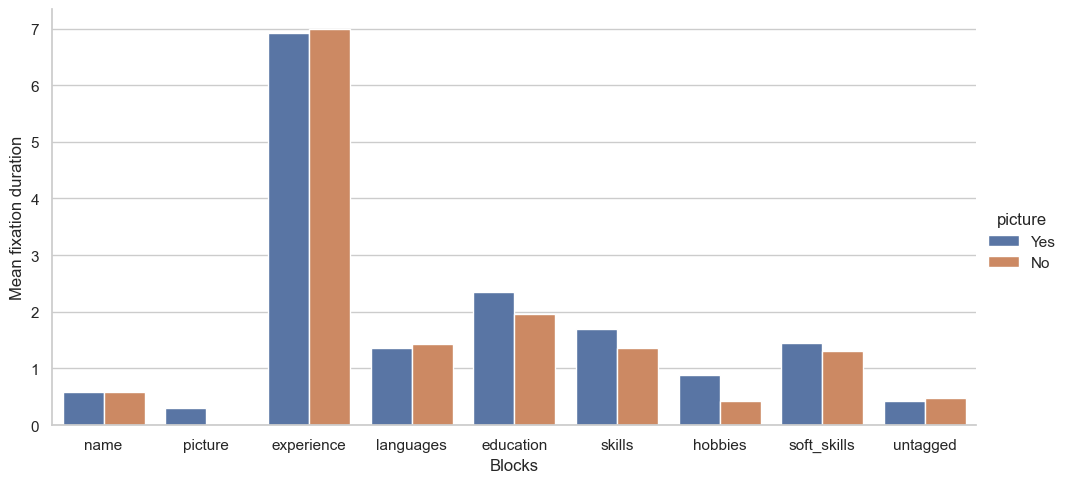

In [21]:
processing_times(times_subjects, "Mean fixation duration")

120
120
          block      time picture
0          name  0.016861     Yes
1       picture  0.011590     Yes
2    experience  0.181562     Yes
3     languages  0.046977     Yes
4     education  0.070240     Yes
5        skills  0.043476     Yes
6       hobbies  0.030871     Yes
7   soft_skills  0.033930     Yes
8      untagged  0.014493     Yes
10         name  0.017592      No
11      picture  0.000000      No
12   experience  0.186362      No
13    languages  0.049908      No
14    education  0.062955      No
15       skills  0.042789      No
16      hobbies  0.029460      No
17  soft_skills  0.031229      No
18     untagged  0.021371      No


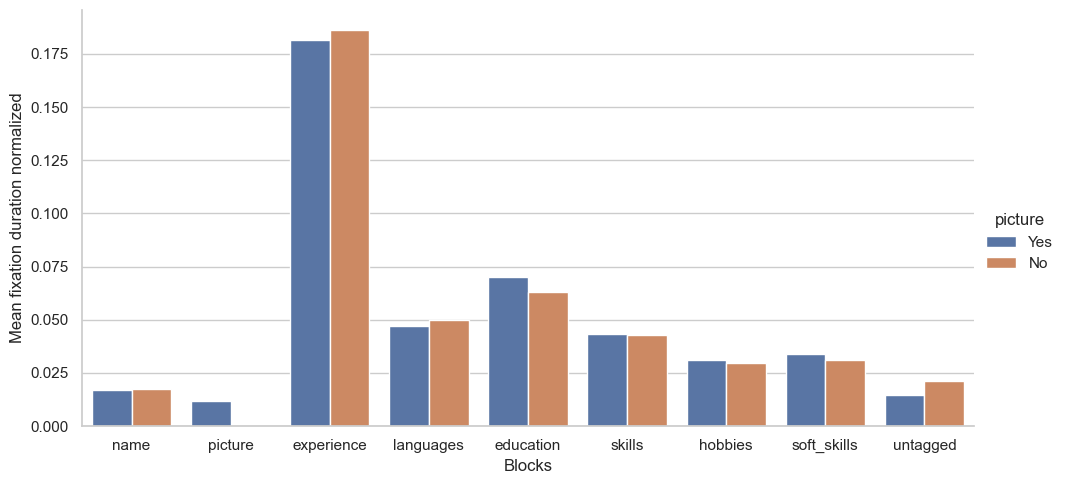

In [22]:
processing_times(times_subjects_norm, "Mean fixation duration normalized")

In [23]:
# block_times_resumes_with_pic = []
# block_times_resumes_without_pic = []

In [24]:
# for subject_resumes in times_subjects:
#     resume_names = subject_resumes.keys()
    
#     for resume_name in resume_names:
#         if contains_picture(resume_name):
#             block_times_resumes_with_pic.append(subject_resumes[resume_name])
#         else:
#             block_times_resumes_without_pic.append(subject_resumes[resume_name])


In [25]:
# block_times_resumes_with_pic

In [26]:
# block_times_resumes_without_pic

In [27]:
# block_times_with_pic = {}
# block_times_without_pic = {}

# for resume_times in block_times_resumes_with_pic:
#     for key, value in resume_times.items():
#         if key in block_times_with_pic:
#             block_times_with_pic[key] += value
#         else:
#             block_times_with_pic[key] = value
            
# for resume in block_times_resumes_without_pic:
#     for key, value in resume.items():
#         if key in block_times_without_pic:
#             block_times_without_pic[key] += value
#         else:
#             block_times_without_pic[key] = value

In [28]:
# block_times_with_pic

In [29]:
# block_times_without_pic

In [30]:
# def mean_block_times(block_times, num_of_resumes):
#     mean_block_times = {}
#     print(num_of_resumes)
    
#     for key, value in block_times.items():
#         mean_block_times[key] = value / num_of_resumes
        
#     return mean_block_times

In [31]:
# mean_scaled_block_duration_pic = mean_block_times(block_times_with_pic, len(block_times_resumes_with_pic)) 
# mean_scaled_block_duration_nopic = mean_block_times(block_times_without_pic, len(block_times_resumes_without_pic)) 

In [32]:
# blocks = []
# relative_times = []
# pictures = []

# for key, value in mean_scaled_block_duration_pic.items():
#     blocks.append(key)
#     relative_times.append(value)
#     pictures.append("Yes")  

# for key, value in mean_scaled_block_duration_nopic.items():
#     blocks.append(key)
#     relative_times.append(value)
#     pictures.append("No")

# df = pd.DataFrame({
#     'block': blocks,
#     'relative_time': relative_times,
#     'picture': pictures
# })


# #df['picture'] = df['picture'].astype(str)
# print(df)

In [33]:
# df = df[df['block'] != 'total_time_on_resume']
# print(df)

In [34]:
# import seaborn as sns
# sns.set_theme(style="whitegrid")

# g = sns.catplot(
#     data=df, kind="bar",
#     x="block", y="relative_time", hue="picture", aspect = 2)
    
# g.set_axis_labels("Blocks", "Mean fixation duration normalized")
  